In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('test1.csv', sep=',')

df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,Age,BMI,Diabetes,age_group,map
0,2,1,1,0,0,1,0,50,1,0,3,2
1,1,3,1,0,0,1,1,55,3,0,4,4
2,1,3,1,0,0,0,1,52,1,0,4,2
3,2,1,1,0,0,1,1,48,2,1,3,5
4,1,1,1,0,0,0,0,48,1,0,3,0


In [6]:
df

,gender,cholesterol,gluc,smoke,alco,active,cardio,Age,BMI,Diabetes,age_group,map
0,2,1,1,0,0,1,0,50,1,0,3,2
1,1,3,1,0,0,1,1,55,3,0,4,4
2,1,3,1,0,0,0,1,52,1,0,4,2
3,2,1,1,0,0,1,1,48,2,1,3,5
4,1,1,1,0,0,0,0,48,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60681,1,1,1,0,0,1,1,54,1,1,4,3
60682,1,1,1,0,0,1,1,58,2,1,5,3
60683,2,1,1,1,0,1,0,53,2,1,4,2
60684,1,1,2,0,0,0,1,61,2,1,6,3


In [7]:
df_og=df

df=df.drop(['Age'] ,axis=1)

df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,Diabetes,age_group,map
0,2,1,1,0,0,1,0,1,0,3,2
1,1,3,1,0,0,1,1,3,0,4,4
2,1,3,1,0,0,0,1,1,0,4,2
3,2,1,1,0,0,1,1,2,1,3,5
4,1,1,1,0,0,0,0,1,0,3,0


In [9]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,Diabetes,age_group,map
count,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000
mean,0.347889,0.352355,0.220512,0.085720,0.052038,0.803942,0.491151,1.675988,0.446166,4.044541,2.455163
std,0.476305,0.670923,0.567807,0.279952,0.222106,0.397016,0.499926,0.899754,0.497097,1.376725,1.210698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,4.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,5.000000,3.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,6.000000,5.000000


In [10]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

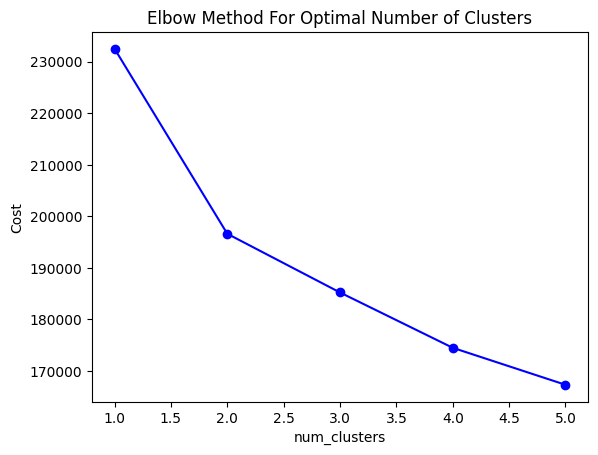

In [11]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [12]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
clusters

array([0, 1, 0, ..., 1, 1, 0], dtype=uint16)

In [13]:
df.insert(0,"clusters",clusters,True)

df.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,Diabetes,age_group,map
0,0,1,0,0,0,0,1,0,1,0,3,2
1,1,0,2,0,0,0,1,1,3,0,4,4
2,0,0,2,0,0,0,0,1,1,0,4,2
3,1,1,0,0,0,0,1,1,2,1,3,5
4,0,0,0,0,0,0,0,0,1,0,3,0


In [8]:
fichier_csv = 'test1.csv'

# Enregistrement du DataFrame dans un fichier CSV
df.to_csv(fichier_csv, index=False)